***
# Decision Trees

it predicts an outcome by asking a sequence of if-the questions about the input feature
***

1. used for both the regression and classification tasks
2. pure node  - converged to one single class - split dataset until it becomes homogeneous

algorithms :

1. CART  - default for sklearn - uses entropy
2. ID3/C4.5 - uses gini impurity
3. CHAD

## TO BUILD A DECISION TREE WE NEED:

    1. FEATURE SELECTION FOR SPLIT
    2. FIND DEGREE OF PURITY OF SPLIT:
        A. ENTROPY
        B. GINI IMPURITY/INDEX

# ENTROPY

## MEASURES THE IMPURITY,DISORDER OR UNCERTAINITY IN A DATASET


***
Range - [0,1]

### when probability is 0 then entropy is 0 --->> MIN
### when probability is 1 then entropy is 0 --->> MAX

### when probability is 0.5 then entropy is 1 --->>  MAX

formula ->> E(s) = - sigma(P{i}.log P{i}))
where, p{i} = probability of class i , i is from 1 to all the  classes

###         example : for yes and no class:
###             E(s) = -p(y).log p(y) - p(n).log p(n)
***

# GINI IMPURITY

## measures the likelihood of a random element being misclassified

### Formula -->> |GI = 1 - sigma(p{i}^2)| for all classes

***

for binary classification MAX GI = 0.5

greater value ==> more impure

for yes in yes or no class
    GI = 1 - (p{y}2 - p{n}2)

IG = entropy of parent - weighted entropy of children

Gini gain = Gini impurity of root node - weighted GI of the children

***
# IMPLEMENTATION
***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
# DATA PREPROCESSING

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
features = ["pclass", "sex","fare", "embarked","age"]

target= ["survived"]

In [7]:
#handling missing values

from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy = "most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [8]:
# FEATURE ENCODING

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])


In [9]:
X = titanic[features]
y = titanic[target]

In [10]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [11]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [12]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2,random_state=42
)

In [13]:
# building decision tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()# no pruning

model.fit(X_train,y_train)


DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score as acc

y_pred = model.predict(X_test)

print("acc : ", acc(y_test,y_pred))

acc :  0.770949720670391


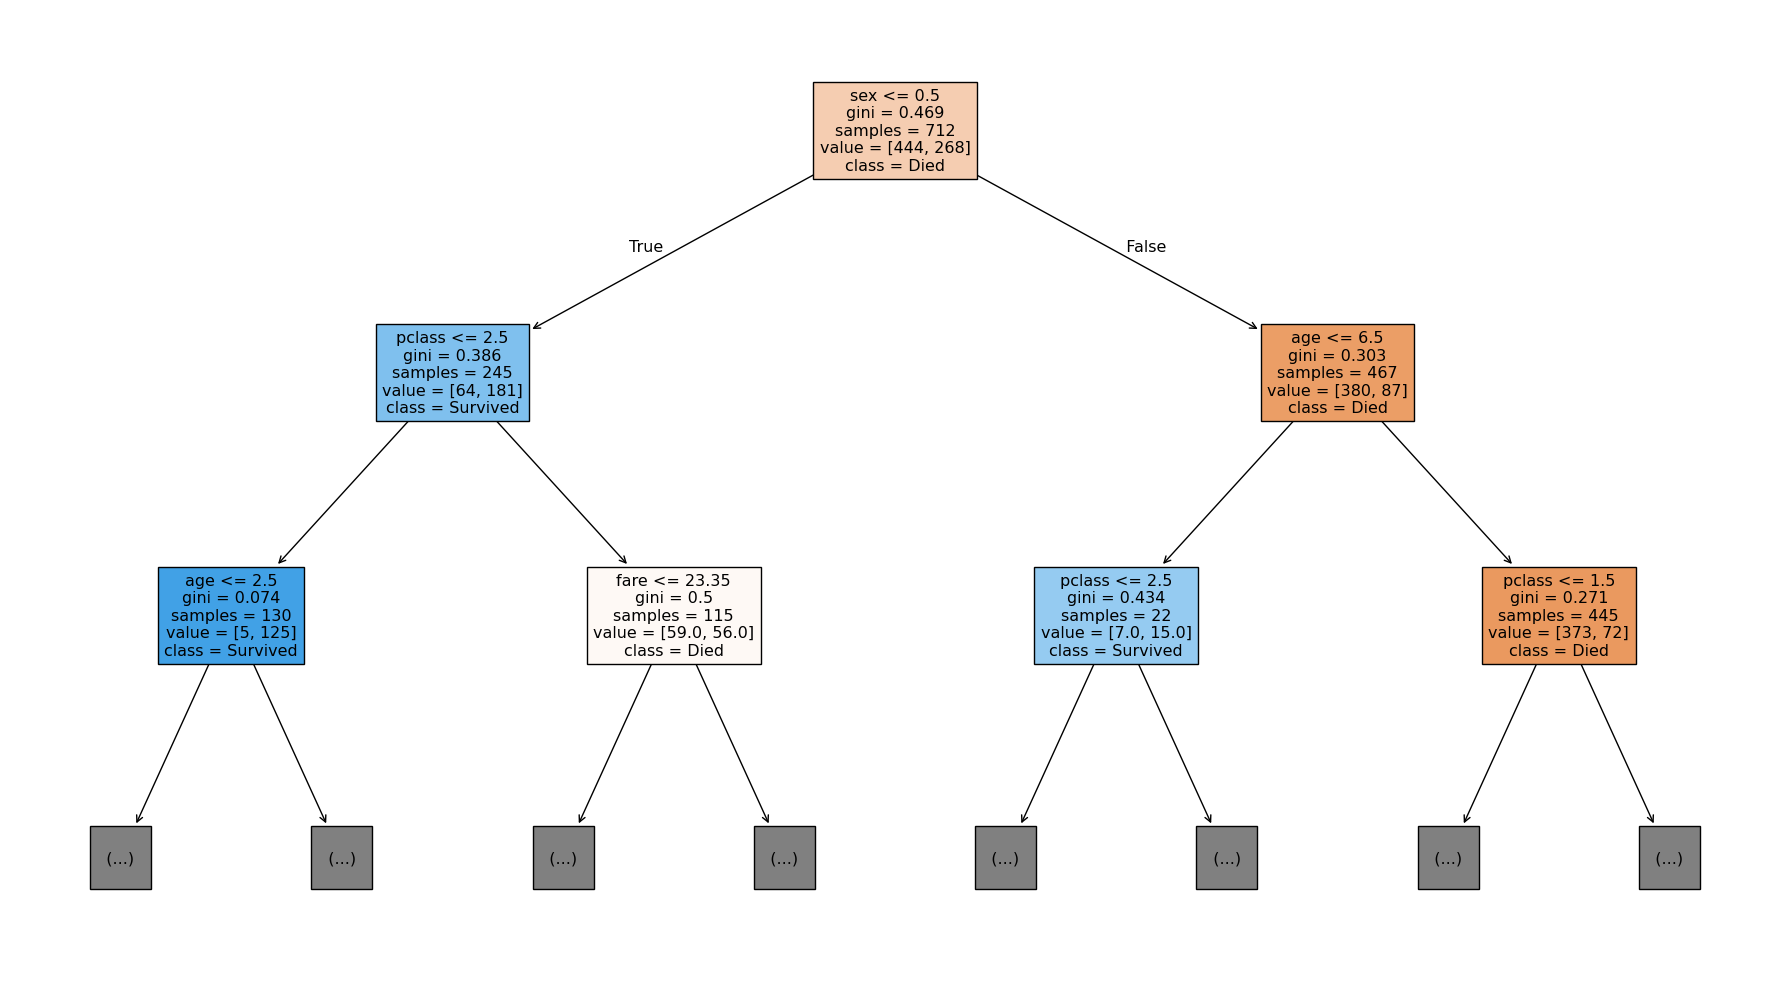

In [15]:
from sklearn.tree  import plot_tree

plt.figure(figsize = (18,10))

plot_tree(
    model,
    feature_names  = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    max_depth = 2
)

plt.tight_layout()
plt.show()

In [16]:
# PRE-PRUNING IN DECISION TREE

for  depth  = 2  accuracy = 0.7653631284916201
for  depth  = 3  accuracy = 0.7988826815642458
for  depth  = 4  accuracy = 0.7988826815642458


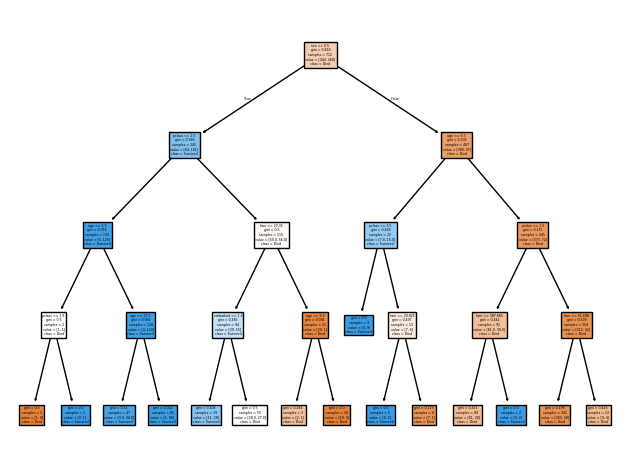

for  depth  = 5  accuracy = 0.7988826815642458
for  depth  = 6  accuracy = 0.8044692737430168
for  depth  = 7  accuracy = 0.7988826815642458
for  depth  = 8  accuracy = 0.7988826815642458
for  depth  = 9  accuracy = 0.7932960893854749
for  depth  = 10  accuracy = 0.7932960893854749


In [17]:
max_depths = [2,3,4,5,6,7,8,9,10]

for i in max_depths:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train,y_train)

    acc = model.score(X_test, y_test)
    print(f"for  depth  = {i}  accuracy = {acc}")

    if i== 4:
        plot_tree(
            model,
            feature_names  = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
        )
        
        plt.tight_layout()
        plt.show()

for sample split 5 , accuracy is: 0.7988826815642458
for sample split 10 , accuracy is: 0.7988826815642458


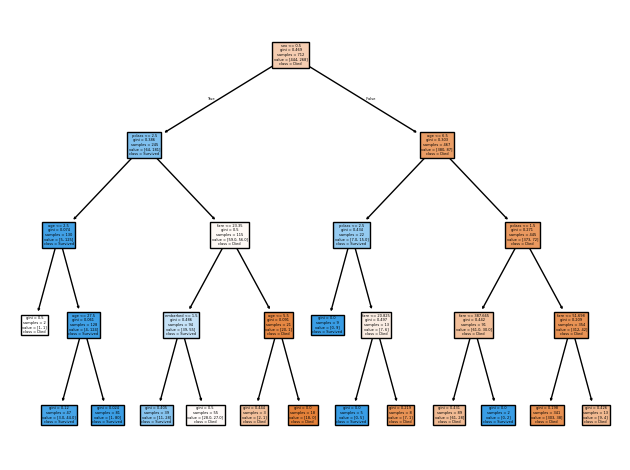

for sample split 15 , accuracy is: 0.7988826815642458
for sample split 20 , accuracy is: 0.7988826815642458
for sample split 25 , accuracy is: 0.7932960893854749


In [18]:
min_sample_splits = [5,10,15,20,25,]

for split in min_sample_splits:
    model = DecisionTreeClassifier(max_depth = 4 , min_samples_split = split)
    model.fit(X_train , y_train)

    acc = model.score(X_test , y_test)
    print(f"for sample split {split} , accuracy is: {acc}")

    if split== 10:
        plot_tree(
            model,
            feature_names  = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
        )
        
        plt.tight_layout()
        plt.show()

In [19]:
# POST-PRUNING IN DECISION TREES

full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
path = full_tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [21]:
# remove the sub-trees where the complexity is too high
# ==>> helps to generalize the model

In [24]:
# train for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 42, ccp_alpha = alpha)
    model.fit(X_train,y_train)

    trees.append((model,alpha))

In [26]:
best_acc = 0
best_alpha = 0

for model,alpha in trees:
    curr_acc = model.score(X_test,y_test)
    if curr_acc > best_acc :
        best_acc = curr_acc
        best_alpha = alpha
    

In [27]:
best_alpha

np.float64(0.0015407231242023183)

In [28]:
best_acc

0.8379888268156425

In [33]:
best_model = DecisionTreeClassifier(ccp_alpha = best_alpha, max_depth = 4)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0015407231242023183), max_depth=4)

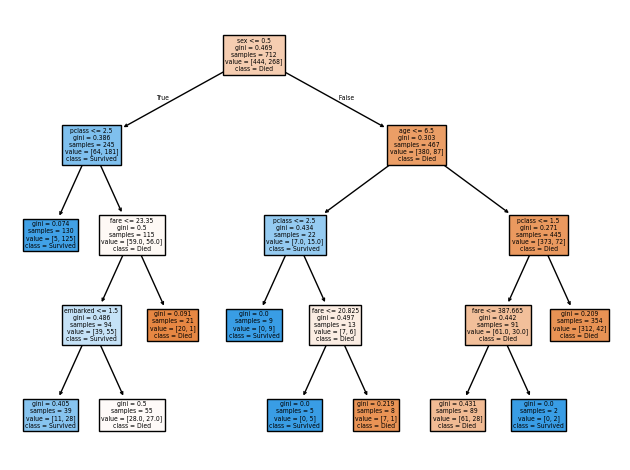

In [34]:
plot_tree(
    best_model,
    feature_names  = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
)
        
plt.tight_layout()
plt.show()